# How can the company  imporve  collaboration?

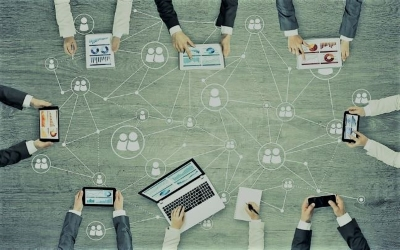

### Outline:
- Executive Summary 
- Key Recommendations
- Main Objectives
1. Loading Packages and Data
2. Preparing the Data for Analysis
3. Exploratory Data Analysis


### Executive Summary
- The network analysis indicates that: The data collected began from 2021-06-02 to 2021-11-29. 3512 times messages sent, and 85 employees have sent the messages and 617 employees have received the messages. There are six departments
                                   1. sale
                                   2. operation 
                                   3. admin
                                   4. IT
                                   5. marketing 
                                   6. engineering
                                   
from these  departments  sale, operation and admin   have better employees collaboration but rest of others departments(IT, marketing and engineering) have less employees collaboration. And they have employees in different five location

                                    1. USA 
                                    2. France
                                    3. UK
                                    4. Germany 
                                    5. Brasil
from these locations  USA and France have better employees  collaboration, they have sent the messages more than 86 percent, UK, Brasilia and Germany have less employees collaboration, they have sent messages less than 14 percent. There for sale, admin and operation departments are influential and id number 605 are influential employees.

## 💪 Main Objectives

 To create a report that covers the following:  
  1. Which departments are the most/least active?
  2. Which employee has the most connections? 
  3. Identify the most influential departments and employees.
  4. Using the network analysis, in which departments would you recommend the HR team focus to boost collaboration?

### Key Recommendations
- The network analysis will recommend following points
    1. The trend of sending messages are decreasing when we compare with first months and 75 percent of messages has sent in first months,  so the HR teams needs to imporve messages sending practices between  employees.
    2. The HR teams should give attention for the following department 
        1. marketing 
        2. IT
        3. engineering 
        . additional for admin department 
        
    3. The HR teams need to give more attention for these country employees:
         1. UK
         2. Brasil
         3. Germany
          - because they have less active employees they sent only 16 percent when we compare with all locations.
    4. The HR teams have to encourage the employees to send a messages because the network analysis shows that there is low trends of sending messages, only 85 employees have sent a messages but 617 employees have received the messages. 
    5. The HR teams need to focus  the following country and department employees 
       1. In UK except admin and sale 
       2. In Brasil admin and marketing  department 
       3. In France marketing 
       
  6. Additional, to accurate  analysis, it needs more data such as 
       1. postion of employees 
       2. size of employees in a company
       3. size of employees in a country
       
    

### 1. Loading Packages and Data.

In [1]:
import numpy as np 
import pandas as pd # for data manipulation
import matplotlib.pyplot as plt # for data visualization 
import seaborn as sns # for interactive visualization
sns.set() # to plots seaborn like 

In [5]:
# reading the messages data 
messages = pd.read_csv('data/messages.csv', parse_dates= ['timestamp'])
# to print five rows of data
display(messages.head())
# to get shape of data
print('shape is ', messages.shape)

,sender,receiver,timestamp,message_length
0,79,48,2021-06-02 05:41:34,88
1,79,63,2021-06-02 05:42:15,72
2,79,58,2021-06-02 05:44:24,86
3,79,70,2021-06-02 05:49:07,26
4,79,109,2021-06-02 19:51:47,73


shape is  (3512, 4)


### 1.1 observation :
There is 3512 rows and 4 columns from that the sender and receiver columns are represent the ID, And one  date column and numeric

#### Messages has information on the sender, receiver, and time.
- "sender" - represents the employee id of the employee sending the message.
- "receiver" - represents the employee id of the employee receiving the message.
- "timestamp" - the date of the message.
- "message_length" - the length in words of the message.

In [6]:
# to read employees data
employees = pd.read_csv('data/employees.csv')
# to print five rows of data
display(employees.head())
# to get shape of data
print('shape is ', employees.shape)

,id,department,location,age
0,3,Operations,US,33
1,6,Sales,UK,50
2,8,IT,Brasil,54
3,9,Admin,UK,32
4,12,Operations,Brasil,51


shape is  (664, 4)


### 1.2 observation:
- There are 664 rows and 4 columns

#### Employees has information on each employee;
- "id" - represents the employee id of the employee.
- "department" - is the department within the company. 
- "location" - is the country where the employee lives.
- "age" - is the age of the employee.


### 2. Preparing Data for Analysis 

#### 2.1 Merge the Table
- There are two tables that are employees and messages.
- We can merge them by using id column from employees table and sender and receiver column from messages table. 
- When we merge this two table, we need to merge the table two times because we need to bring both sender and receiver information from employees table


In [7]:
# merge the employees table and messages table by using 'id and sender', this for bring sender information.
df=employees.merge(messages, left_on='id', right_on='sender')
# to print five rows of data
display(df.head())
# to get shape of data
print('shape is', df.shape)

,id,department,location,age,sender,receiver,timestamp,message_length
0,79,Sales,France,33,79,48,2021-06-02 05:41:34,88
1,79,Sales,France,33,79,63,2021-06-02 05:42:15,72
2,79,Sales,France,33,79,58,2021-06-02 05:44:24,86
3,79,Sales,France,33,79,70,2021-06-02 05:49:07,26
4,79,Sales,France,33,79,109,2021-06-02 19:51:47,73


shape is (3512, 8)


### 2.1 observation :
- Now there is 8 columns and 3512 rows, four columns have added.
- we have merged id and sender so we need to merge also id and receiver.
- why we merge id and receiver id because we need to get the receiver information.

In [8]:
# we merge id and receiver to get receiver information ℹ 
df=df.merge(employees, how='left',  left_on='receiver', right_on='id', suffixes=('_sender', '_receiver'))
# to print five rows of data
display(df.head())
# to get shape of data
print(df.shape)

,id_sender,department_sender,location_sender,age_sender,sender,receiver,timestamp,message_length,id_receiver,department_receiver,location_receiver,age_receiver
0,79,Sales,France,33,79,48,2021-06-02 05:41:34,88,48,IT,France,34
1,79,Sales,France,33,79,63,2021-06-02 05:42:15,72,63,Sales,France,38
2,79,Sales,France,33,79,58,2021-06-02 05:44:24,86,58,Sales,Germany,40
3,79,Sales,France,33,79,70,2021-06-02 05:49:07,26,70,Operations,France,47
4,79,Sales,France,33,79,109,2021-06-02 19:51:47,73,109,Marketing,Brasil,32


(3512, 12)


 ##### 2.2 observation:
 - There is no change in rows because all rows are present in both.
 - Now there is 12 columns added four messages receiver information columns.

### 2.2 Checking outliers 

In [9]:
# if there is  null value
df.isnull().sum()

id_sender              0
department_sender      0
location_sender        0
age_sender             0
sender                 0
receiver               0
timestamp              0
message_length         0
id_receiver            0
department_receiver    0
location_receiver      0
age_receiver           0
dtype: int64

There is no null value on all columns, that makes easy to work on this data frame.

### 3. Exploratory Data Analysis 

### 3.1  Summary statistics :
1. numeric columns(age and messages length).
2. id columns(id, sender, receiver)
3. date columns

##### 3.1.1 numeric data types

In [10]:
# list of  numeric columns
num_col=['age_sender', 'message_length', 'age_receiver']
# using pd.describe() method we will see summary statistics 
df[num_col].describe()

,age_sender,message_length,age_receiver
count,3512.000000,3512.000000,3512.000000
mean,38.948462,48.450740,41.060934
std,8.348055,22.857461,10.402180
min,23.000000,10.000000,22.000000
25%,31.000000,29.000000,33.000000
50%,38.000000,49.000000,41.000000
75%,47.000000,68.000000,50.000000
max,59.000000,88.000000,59.000000


#### 3.1 observations

##### age sender
1. youngest employers is 23 years old and oldest employers is 59 years old.
2. 75 % of employes age are less than 47 years old.
3. average  employers age is 39 years old.
4. average employers age variation is 8 years.

#### message
1. the minimum length of message is 10 and maximum is 88.
2. 75% of messages length are less than 68 length.
3. average message length is 48 length.

##### age receiver
1. youngest employers is 22 years old and oldest employers is 59 years old.
2. 75 % of employes age are less than 50 years old.
3. average  employers age is 41 years old.
4. average employers age variation is 10 years.


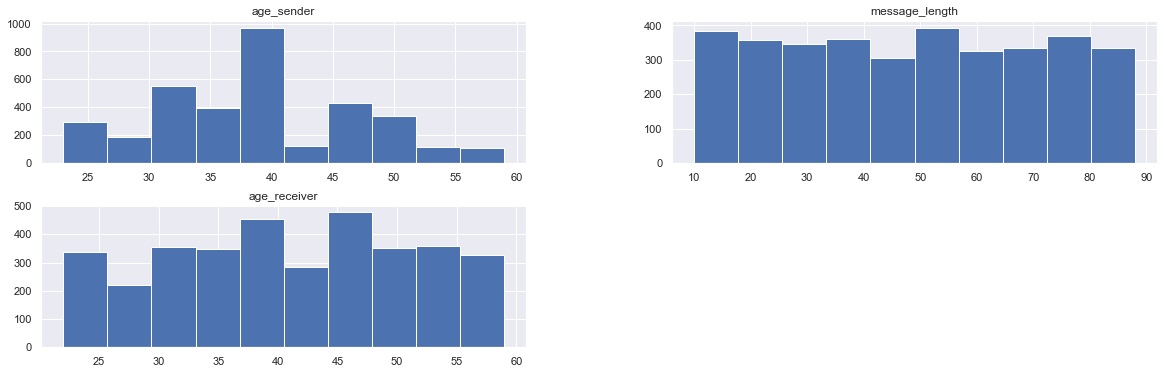

In [11]:
#the distribution of age and message
df[num_col].hist(figsize=(20, 6))
# to see the figure
plt.show()

##### 3.2 Observation:
- age of sender:
   - most of employes are  between 38 - 41 years old, most messages has sent +.
- age of reciver:
    - most of are the same numbers
- most of length of message are almost the same number of count.

#### 3.1.2 id columns

In [12]:
df[['sender', 'receiver']].astype('category').describe()

,sender,receiver
count,3512,3512
unique,85,617
top,605,281
freq,459,60


#####  Observation 3.3:
- For 3512 times message has sent and received.
- 85 employers sent a message and 617 employers has received a message.
- employer who has 'id 459', has sent a message for 605 times that is top.
- employer who has 'id 60', has received a message for 281 times that is top.

#### 3.1.3 Date 

In [13]:
# to get summary of time columns
df['timestamp'].describe(datetime_is_numeric=True)

count                             3512
mean     2021-07-06 18:36:35.106774528
min                2021-06-02 05:41:34
25%      2021-06-16 21:13:31.749999872
50%                2021-06-29 05:50:01
75%      2021-07-08 21:41:41.249999872
max                2021-11-29 07:37:49
Name: timestamp, dtype: object

### 3.4 Observation :
- The message has started since 2021-06-16 21:13:31 and end at 2021-11-29 07:37:49.
- The 75% of message was sent before 2021-07-08 that means in first months(06-07) and all message was sent in six months.

### 3.5 Trends

#### 3.5.1 timestamp vs  message sent 

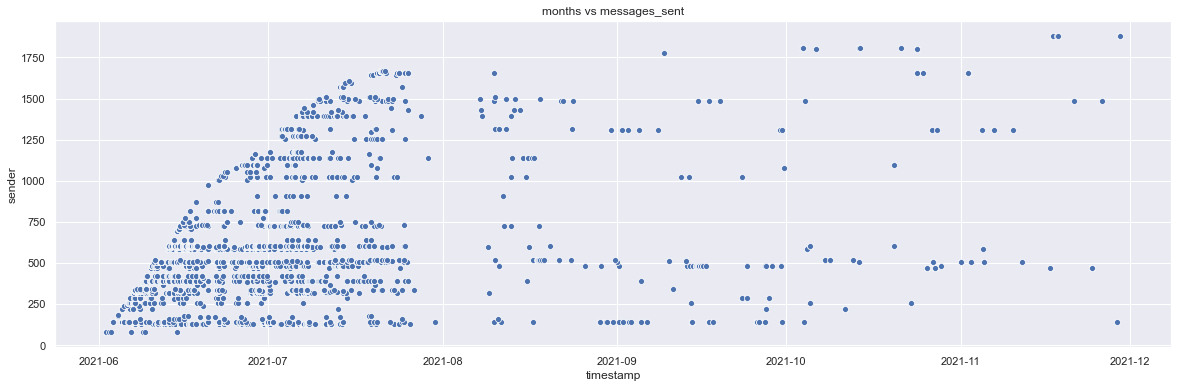

In [14]:
# to set figure size
plt.figure(figsize=(20, 6))
# to plot on x axis timestamp and y axis sender
sns.scatterplot('timestamp', 'sender',  data=df)
plt.title('months vs messages_sent')
plt.show()

#### 3. 5 Observation :
- The most of message sent in first two months.
- After two months the message sending had decreased.

#### 3.5.1 timestamp vs  message length

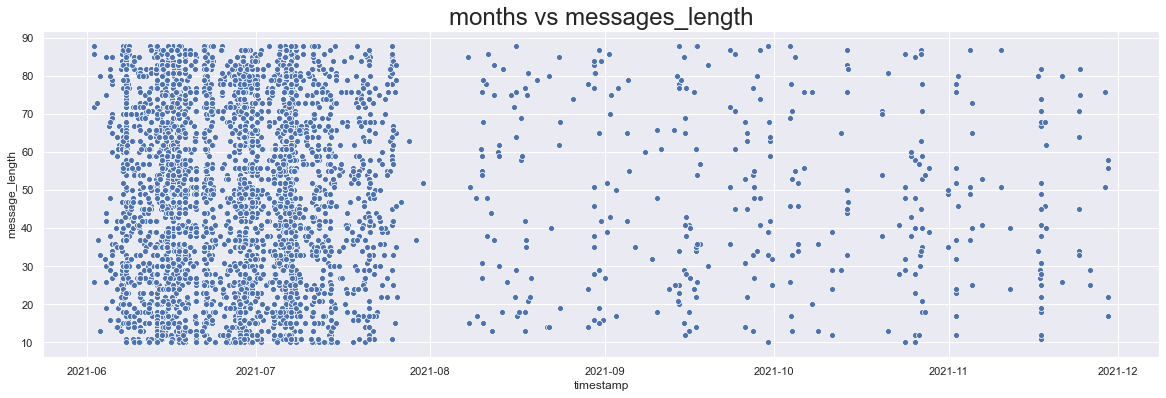

In [17]:
plt.figure(figsize=(20, 6))
sns.scatterplot('timestamp', 'message_length',  data=df)
plt.title('months vs messages_length', fontsize=24)
plt.show()

This is the same as previous figure it shows the most of lengthy messages  sent in first two months.

##### 1. Which departments are the most/least active?

In [18]:
""" this summary function used for to find count and percent of feature
when we call this funaction,  we need to give the data and column name. 
"""
def summary(data, col):
    # to counts the value frequency 
    counts=data[col].value_counts()
    # to get percent
    lst=(counts.values / 3512) * 100
    # to change into DataFrame
    data=pd.DataFrame({'counts':counts, 'percent':lst})
    return data

In [19]:
# to call summary function
summary(df, 'department_sender')

,counts,percent
Sales,1551,44.162870
Operations,1013,28.843964
Admin,857,24.402050
IT,49,1.395216
Engineering,26,0.740319
Marketing,16,0.455581


#### Observation:

##### Most  active department is 
1. SALE
2. Operation
3. Admin
- there is six departments.
- most active department is sell.
- sell department has sent messages for 1551 times that is 44 % of all messages has sent.

##### Less active department is 
1. MARKETING
2. Engineering 
3. IT
- Marketing is less active, It only for 16 time has sent messages and 0.5%.

In [20]:
# this functions used for to set label
def labels(x, y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i])

##### 3.6 visualization of most active and less active department

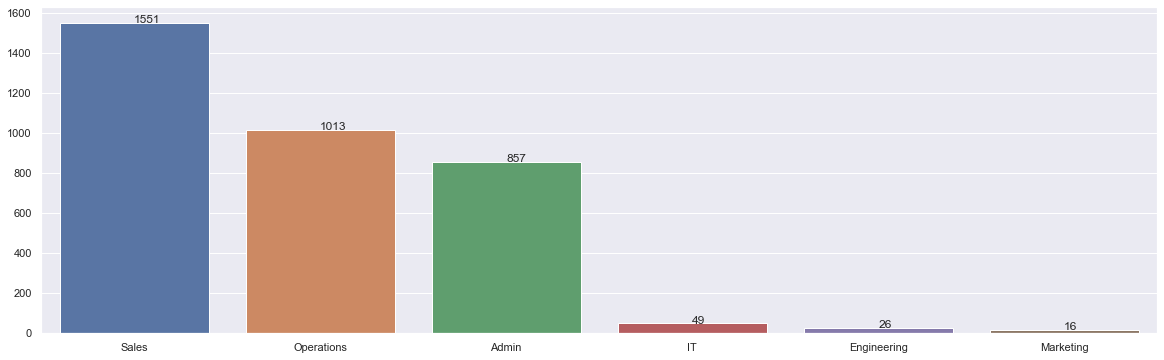

In [21]:
# to counts numbers of message has sent.
active_dept=df['department_sender'].value_counts()
# to set size of figure
plt.figure(figsize=(20, 6))
# to plot bar with x axis is name of department and y axis is number of message that has sent.
sns.barplot(x=active_dept.index, y=active_dept.values)
labels(active_dept.index, active_dept.values)
plt.show()

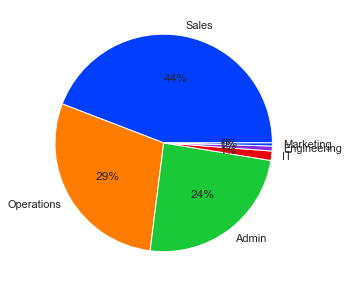

In [22]:
# set figure size
plt.figure(figsize=(30, 5))
# to get five different color
color=sns.color_palette('bright')[:5]
# to plot pie chart
plt.pie(active_dept.values, labels=active_dept.index, colors=color, autopct='%.0f%%')
plt.show()

#### Observation:
- More than 97 % messages has sent by three departments:
   - SALE 44%
   - OPERATIONS 29%
   - ADMIN 24%
 - TOTAL 97 %

#### 3.6.1 which country is most active and less active ?

In [23]:
summary(df, 'location_sender')

,counts,percent
US,1516,43.166287
France,1493,42.511390
Germany,317,9.026196
Brasil,126,3.587699
UK,60,1.708428


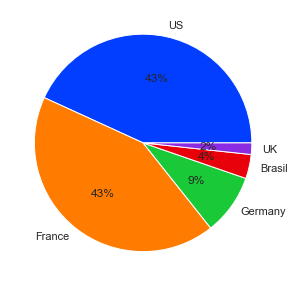

In [24]:
data=df['location_sender'].value_counts().sort_values(ascending= False)
plt.figure(figsize=(30, 5)) # set figure size
color=sns.color_palette('bright')[:5] # to get five different color
plt.pie(data.values, labels=data.index, colors=color, autopct='%.0f%%') # to plot pie chart
plt.show()

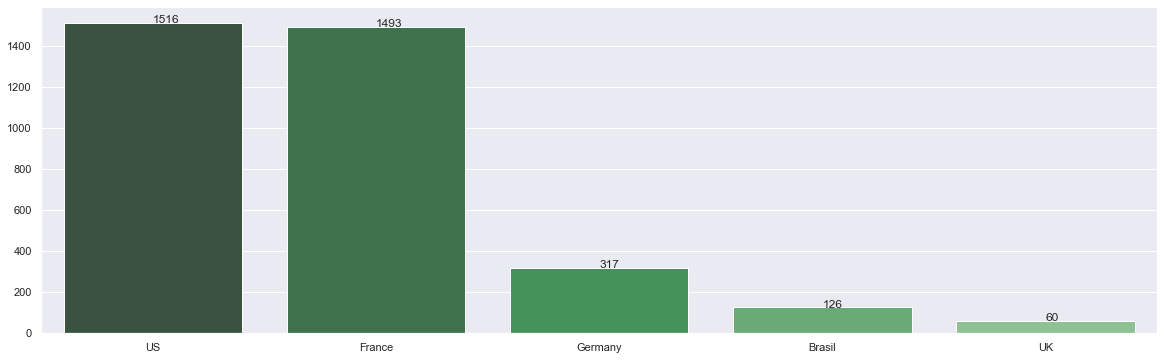

In [25]:
pal=sns.color_palette('Greens_d', 5) # to get five different color
rank=data.argsort()
plt.figure(figsize=(20, 6)) # set figure size
ax=sns.barplot(data.index, data.values, palette=np.array(pal[::-1])[rank])
labels(data.index, data.values)
plt.show()

###### The most active employers country are:
1. USA(1516 times messages sent)
2. France (1493 times messages sent)
- 86% of message has sent from US and France.
- US(1516) + France(1493) / 3512=86%


###### The less active country are:
1. UK(only 60 times has sent messages)

### Let's see deeply  by location 

In [26]:
us=df[df['location_sender']=='US'] # to slice only us data
france=df[df['location_sender']=='France'] # to slice only france data
germany=df[df['location_sender']=='Germany'] # to slice only germany data
brasil=df[df['location_sender']=='Brasil'] # to slice only brasil data
uk=df[df['location_sender']=='UK'] # to slice only uk data


In [27]:
us['department_sender'].value_counts()

Operations     702
Sales          470
Admin          310
Engineering     17
IT              13
Marketing        4
Name: department_sender, dtype: int64

### In US most messages sent by operations department 

In [28]:
france['department_sender'].value_counts()

Sales          748
Admin          493
Operations     242
IT               8
Engineering      2
Name: department_sender, dtype: int64

### In France most messages sent by sale department
### marketing department  has no sent messages

In [29]:
germany['department_sender'].value_counts()

Sales          217
Admin           31
IT              26
Operations      25
Marketing       12
Engineering      6
Name: department_sender, dtype: int64

### In germany  most messages sent by sale department

In [30]:
brasil['department_sender'].value_counts()

Sales          79
Operations     44
IT              2
Engineering     1
Name: department_sender, dtype: int64

### In Brasilia  most messages sent by sale department
### admin and marketing department have not sent any messages


In [31]:
uk['department_sender'].value_counts()

Sales    37
Admin    23
Name: department_sender, dtype: int64

### In UK  only sale and admin departments have sent messages, rest of four departments have not sent any messages.

##### 2. Which employee has the most connections?

- If employees has sent more messages, we can call that has most connection.
- If employees has received more messages, we can call that has most connection.

In [32]:
# to get counts and percent
df_rec=summary(df, 'receiver').sort_values(by='counts', ascending=False)
df_sent=summary(df, 'sender').sort_values(by='counts', ascending=False)
# to get the first 10 rows
df_sent[:10]

,counts,percent
605,459,13.069476
128,266,7.574032
144,221,6.292711
509,216,6.150342
389,196,5.580866
598,187,5.324601
317,184,5.239180
586,180,5.125285
483,169,4.812073
725,137,3.900911


##### Observation 3.8:
- The most connection has employees id number is 605

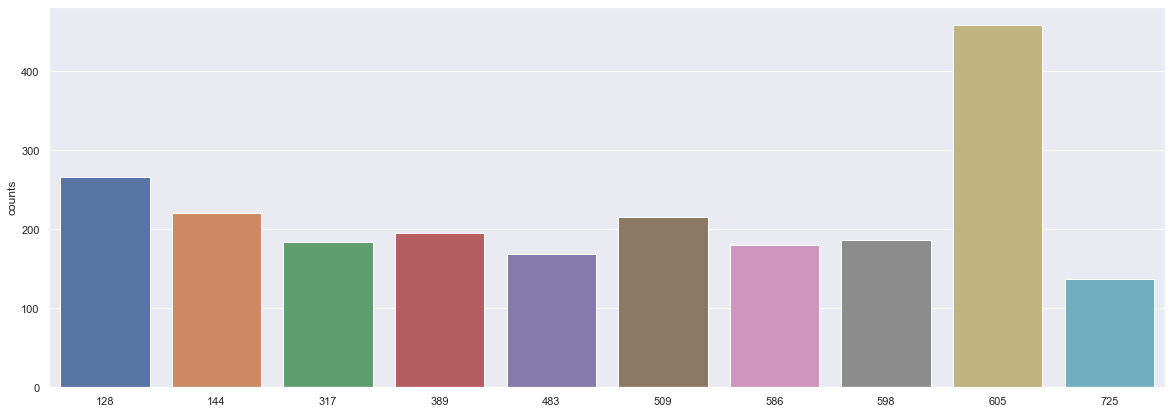

In [33]:
plt.figure(figsize=(20, 7)) # to set figure size
sns.barplot(df_sent[:10].index, df_sent[:10]['counts']) # to plot on x axis id and y axis counts
plt.show()

##### which is his department ? 

In [34]:
df_605=df[df['sender']==605]
df_605['department_sender'].value_counts()

Admin    459
Name: department_sender, dtype: int64

##### ADMIN

##### where is his location ?

In [35]:
df_605['location_sender'].value_counts()

France    459
Name: location_sender, dtype: int64

#### FRANCE

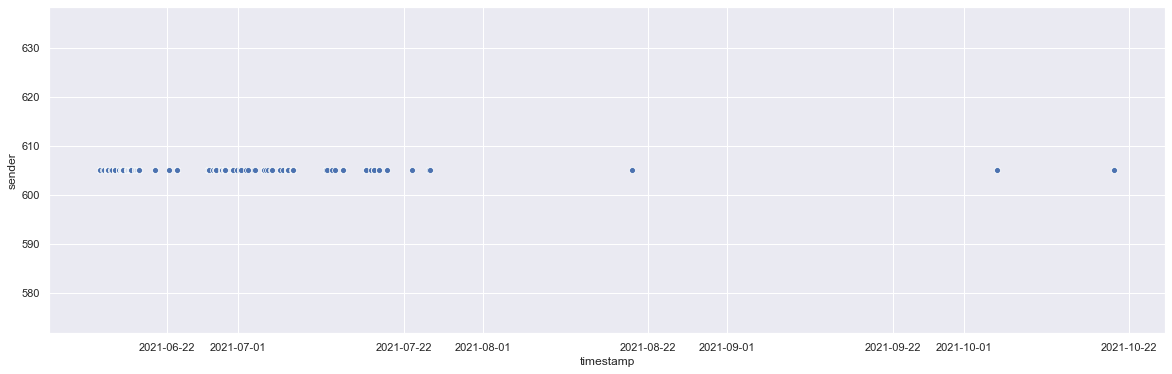

In [36]:
plt.figure(figsize=(20, 6))
sns.scatterplot(df_605['timestamp'], df_605['sender'])
plt.show()

In [37]:
df_rec[:10]

,counts,percent
281,60,1.708428
704,54,1.537585
308,51,1.452164
830,47,1.338269
236,47,1.338269
32,47,1.338269
454,46,1.309795
254,44,1.252847
542,42,1.195900
103,40,1.138952


##### Observation 3.9 :
- The employees who id number is 281 has most connections 
- 1.7 % of messages sent to for this employees

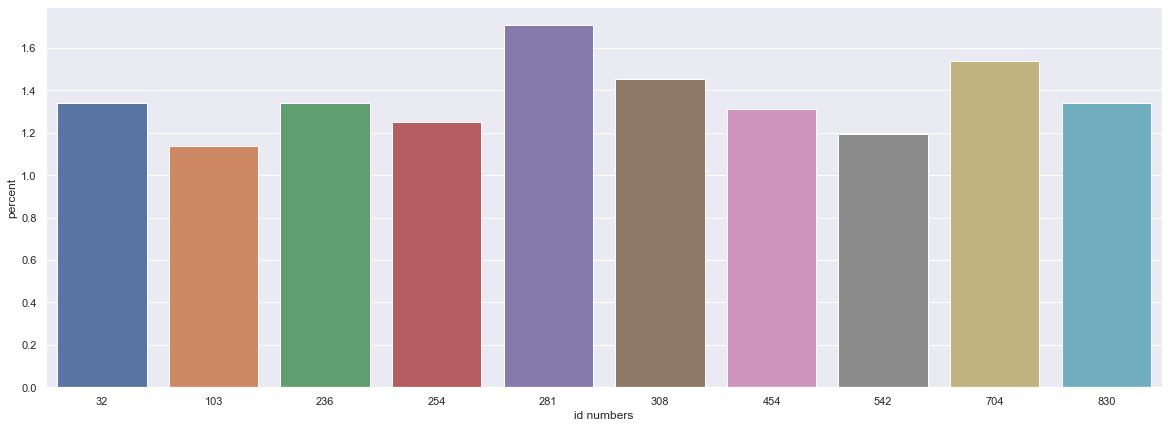

In [38]:
plt.figure(figsize=(20, 7))
sns.barplot(df_rec[:10].index, 'percent', data=df_rec[:10])
plt.xlabel('id numbers')
plt.show()

### Average of sent and received messages

In [39]:
df_rec['id']=np.array(df_rec.index)
df_sent['id']=np.array(df_sent.index)
df_full=df_sent.merge(df_rec, how='outer', on='id', suffixes=('_sent', '_received'))
df_full.fillna(0, inplace=True)
df_full['averag_message']= (df_full['percent_sent'] + df_full['percent_received']) /2
df_full=df_full.sort_values(by='averag_message', ascending=False)
df_full.head(10)


,counts_sent,percent_sent,id,counts_received,percent_received,averag_message
0,459.0,13.069476,605,37.0,1.053531,7.061503
1,266.0,7.574032,128,5.0,0.142369,3.858200
3,216.0,6.150342,509,14.0,0.398633,3.274487
2,221.0,6.292711,144,8.0,0.227790,3.260251
4,196.0,5.580866,389,22.0,0.626424,3.103645
6,184.0,5.239180,317,26.0,0.740319,2.989749
5,187.0,5.324601,598,11.0,0.313212,2.818907
7,180.0,5.125285,586,3.0,0.085421,2.605353
8,169.0,4.812073,483,0.0,0.000000,2.406036
9,137.0,3.900911,725,0.0,0.000000,1.950456


#### 3.8 The department  most messages has received 

In [40]:
df_rec_dept=summary(df, 'department_receiver')
df_rec_dept

,counts,percent
Sales,1229,34.994305
Operations,845,24.060364
Admin,797,22.693622
Engineering,252,7.175399
IT,249,7.089977
Marketing,140,3.986333


### SALE 
- 35% of messages has sent to sale department

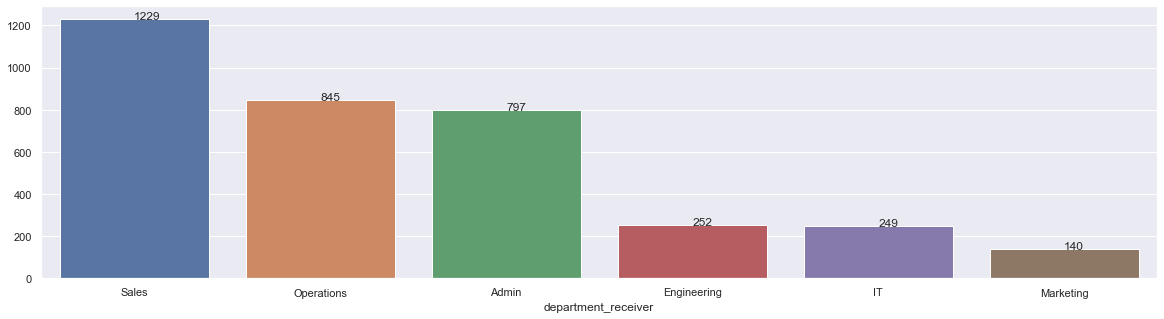

In [41]:
df_con=df.groupby('department_receiver')['receiver'].count().sort_values(ascending = False)
plt.figure(figsize=(20, 5))
sns.barplot(df_con.index, df_con.values)
labels(df_con.index, df_con.values)
plt.show()

### The most messages received location

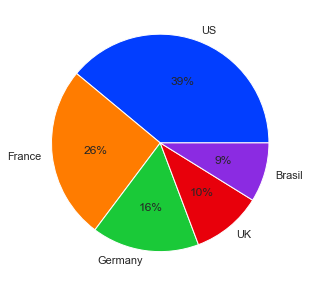

In [42]:
df_loc=df.groupby('location_receiver')['receiver'].count().sort_values(ascending = False)
plt.figure(figsize=(30, 5))
color=sns.color_palette('bright')[:5]
plt.pie(df_loc.values, labels=df_loc.index, colors=color, autopct='%.0f%%')
plt.show()

### USA 39%

## 3. Identify the most influential departments and employees.

In [43]:
df_len=df.groupby('department_sender')['message_length'].mean()
df_len

department_sender
Admin          48.817970
Engineering    32.615385
IT             48.183673
Marketing      61.250000
Operations     48.116486
Sales          48.607995
Name: message_length, dtype: float64

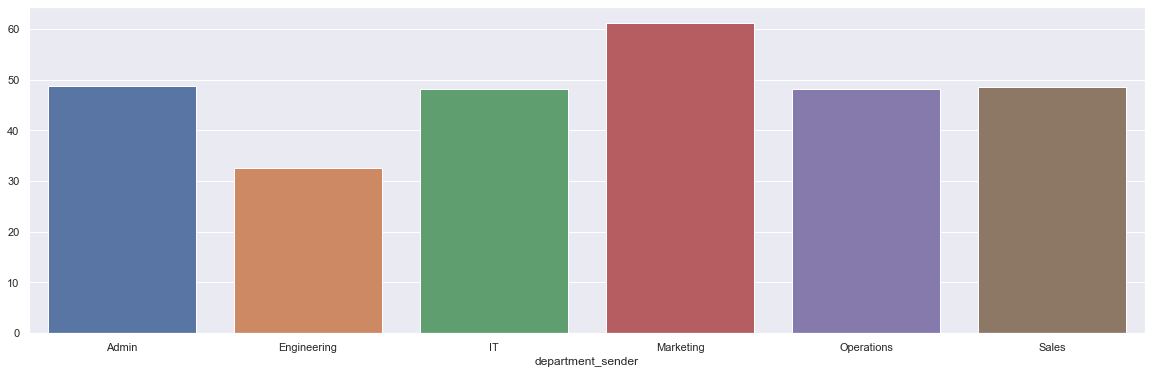

In [44]:
plt.figure(figsize=(20, 6))
sns.barplot(df_len.index, df_len.values)
plt.show()

In [45]:
df_rec_len=df.groupby('department_receiver')['message_length'].mean()
df_rec_len

department_receiver
Admin          48.856964
Engineering    30.734127
IT             44.867470
Marketing      64.378571
Operations     48.523077
Sales          50.681855
Name: message_length, dtype: float64

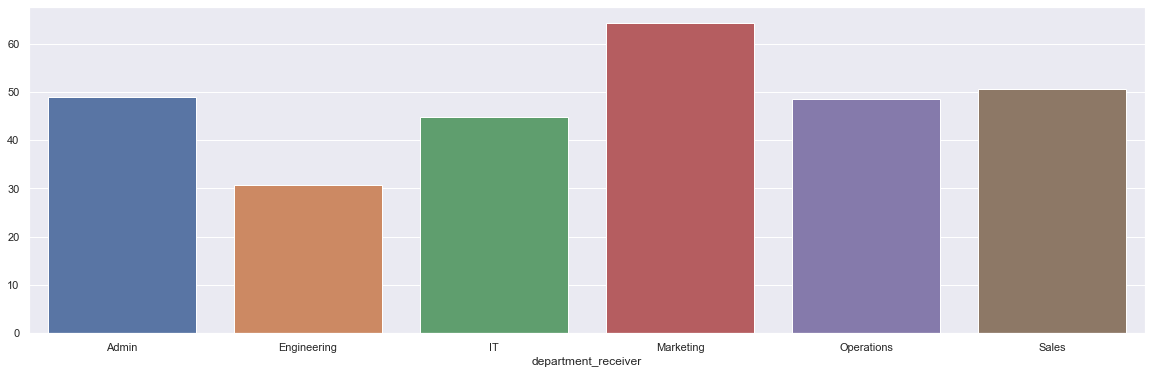

In [46]:
plt.figure(figsize=(20, 6))
sns.barplot(df_rec_len.index, df_rec_len.values)
plt.show()

In [47]:
active_dept

Sales          1551
Operations     1013
Admin           857
IT               49
Engineering      26
Marketing        16
Name: department_sender, dtype: int64

In [48]:
df_rec_loc=summary(df, 'department_receiver')
df_rec_loc

,counts,percent
Sales,1229,34.994305
Operations,845,24.060364
Admin,797,22.693622
Engineering,252,7.175399
IT,249,7.089977
Marketing,140,3.986333


## Departments  are :
### 1, Sell 
- sent messages  1551 times
- received messages  1229 times
- average sent message length is  48.6

### 2, Operations 
- sent messages 1013 times
- received messages 845 times
- average sent message length is 48


### 3, Admin
- sent messages 857 times
- received messages 797 times
- average sent message length is 49

# The marketing department has sent more lengthy message, it sent average is 61.


In [49]:
df_full.head()

,counts_sent,percent_sent,id,counts_received,percent_received,averag_message
0,459.0,13.069476,605,37.0,1.053531,7.061503
1,266.0,7.574032,128,5.0,0.142369,3.858200
3,216.0,6.150342,509,14.0,0.398633,3.274487
2,221.0,6.292711,144,8.0,0.227790,3.260251
4,196.0,5.580866,389,22.0,0.626424,3.103645


In [50]:
df.groupby('id_sender')['message_length'].mean().sort_values(ascending=False)[:5]

id_sender
1171    79.0
977     71.0
1596    69.0
1569    67.0
1802    66.0
Name: message_length, dtype: float64

## Employees are
### 1, id 605
- sent for 459 times
- received for 37  times
- sent average messages length 

### 2, id 128
- sent for 266 times
- received for 5  times
- sent average messages length 

### 3, id 509
- sent for 216 times
- received for 14  times
- sent average messages length 

### The  id 1171 has sent more lengthy messages and average is 79

## 4. Using the network analysis, in which departments would you recommend the HR team focus to boost collaboration?

## Boost collaboration 
- The network analysis shows that the sale, operation and admin departments have better of collaboration, and over 97 percent messages sent by these departments. And in marketing, IT and engineering departments have less collaboration, and  less than 3 percent messages sent from these departments. So the HR team needs to give focus for those departments(
- 1, marketing, 
- 2, IT and 
- 3, engineering). 
- Also they need to give more attention to admin department.  